Alumnos: Lucas Fernandez Capiet - Agustin Bolivar - Mateo Moreno - Gonzalo
Degiuseppe

Año: 2024


# **RESUMEN**

---



El objetivo principal de este trabajo es analizar la relación entre diversas variables y una variable categórica que representa la calidad de las bananas, con el fin de identificar patrones que permitan predecir o explicar esta categoría. Para ello, se usaron herramientas como pandas para la manipulación de datos, matplotlib para la visualización gráfica, y técnicas de análisis estadístico.

# INICIALIZACION

In [ ]:
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("mrmars1010/banana-quality-dataset")

csv_file = f"{path}/banana_quality_dataset.csv"

banana = pd.read_csv(csv_file)
banana_df = pd.DataFrame(banana)

# FILTRADO

In [ ]:
banana_df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


# CODIGO INVESTIGACION

Creamos un mapa de calor para identificar la relacion entre todas las variables

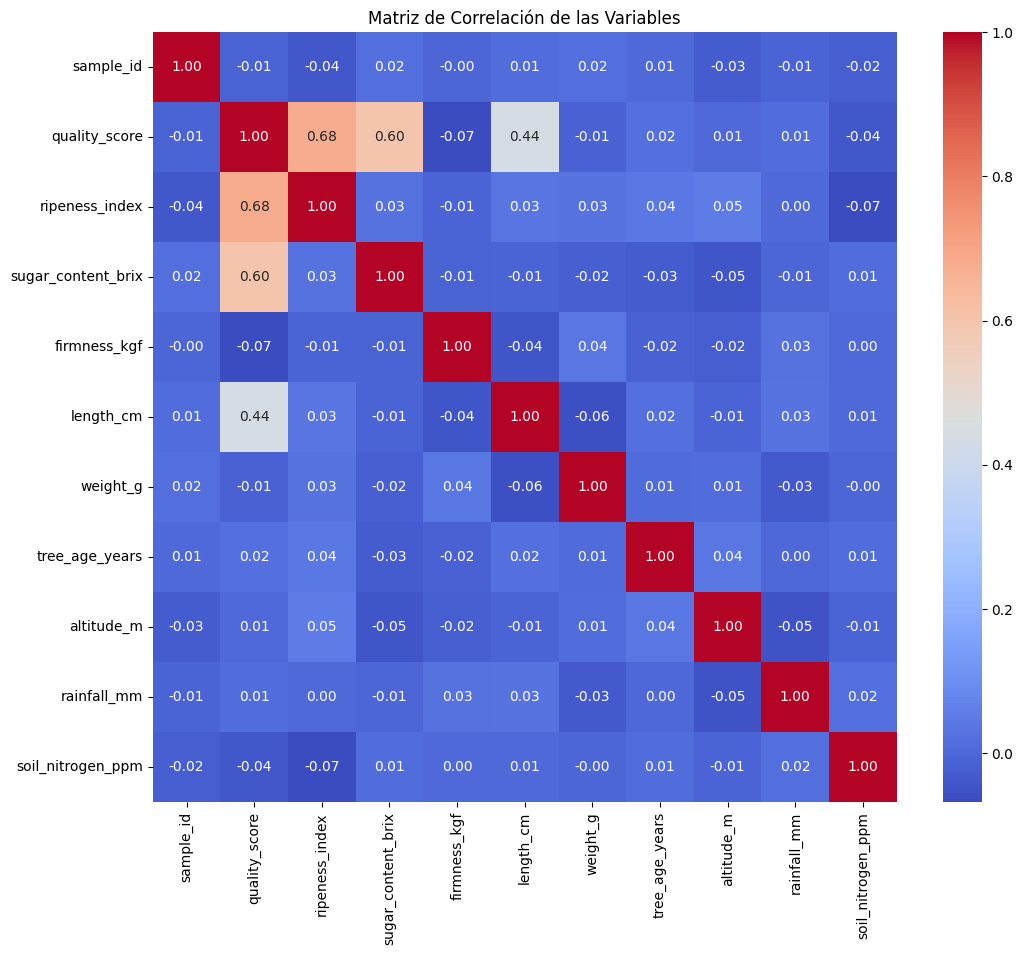

In [ ]:
import seaborn as sns

numerical_columns = banana_df.select_dtypes(include=['number']).columns
correlation_matrix = banana_df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Variables')
plt.show()

De donde proviene cada muestra de nuestro dataset?

region
Ecuador        137
Colombia       136
India          133
Costa Rica     130
Philippines    127
Guatemala      126
Honduras       107
Brazil         104
Name: count, dtype: int64


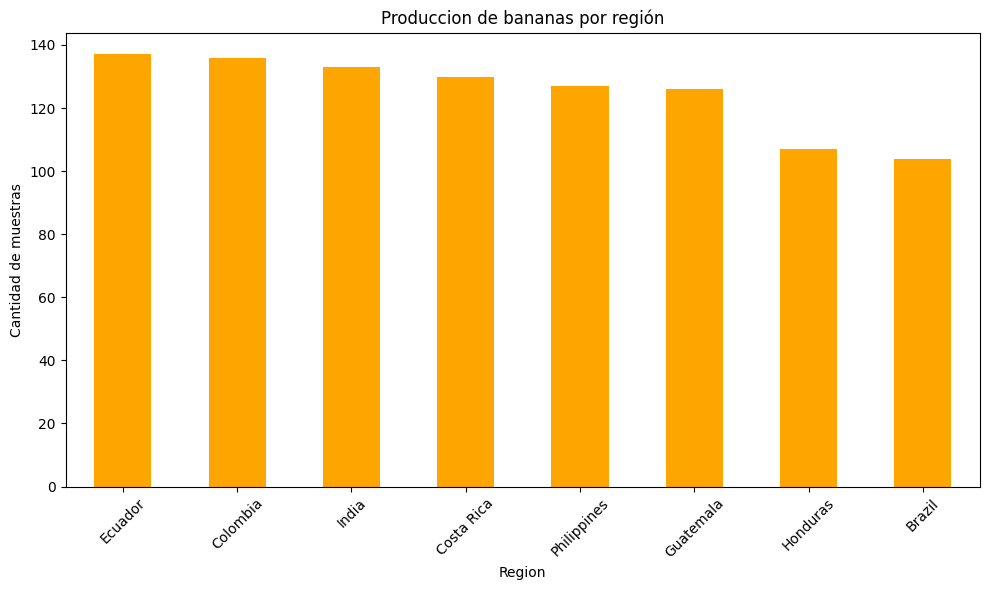

In [ ]:
banana_by_region = banana_df['region'].value_counts()

print(banana_by_region)

plt.figure(figsize=(10, 6))
banana_by_region.plot(kind='bar', color='orange')
plt.title('Produccion de bananas por región')
plt.xlabel('Region')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Que cantidad de cada tipo de banana contiene nuestro dataset?
Esta sesgado?

variety
Plantain       146
Fehi           134
Cavendish      133
Burro          125
Manzano        119
Lady Finger    117
Red Dacca      113
Blue Java      113
Name: count, dtype: int64


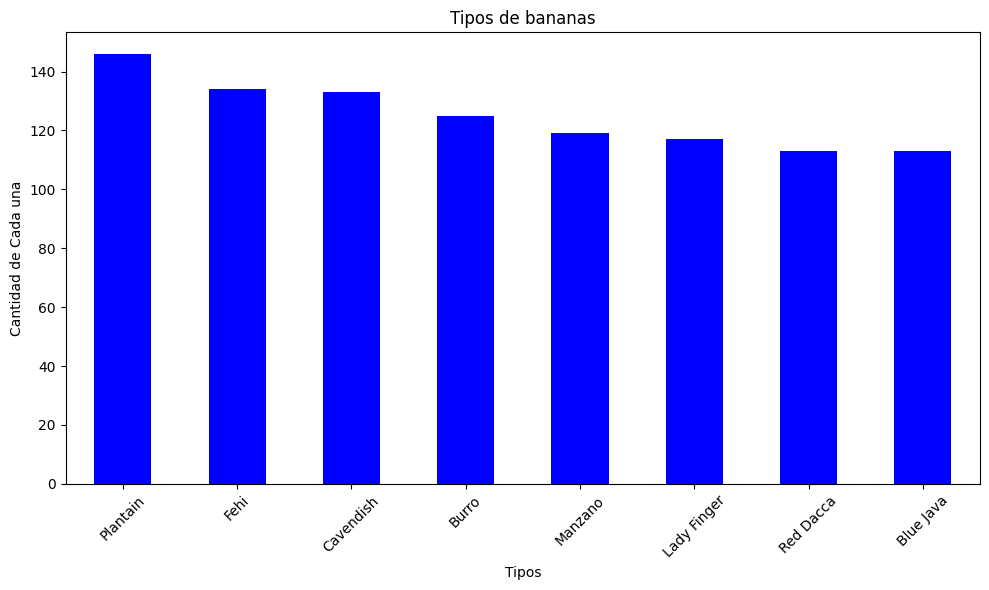

In [ ]:
Dif_types = banana_df['variety'].value_counts()

print(Dif_types)

plt.figure(figsize=(10, 6))
Dif_types.plot(kind='bar', color='blue')
plt.title('Tipos de bananas')
plt.xlabel('Tipos')
plt.ylabel('Cantidad de Cada una')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Que tipos predominan en cada region? Cual deberiamos investigar?

In [ ]:
banana_type_by_region = banana_df.groupby(['region', 'variety'])['variety'].count().unstack()

print(banana_type_by_region)

variety      Blue Java  Burro  Cavendish  Fehi  Lady Finger  Manzano  \
region                                                                 
Brazil              11     12         13    18           13       12   
Colombia             9     24         18    18           17       19   
Costa Rica          17     12         14    18           19       19   
Ecuador             21     15         15    17           16       14   
Guatemala           10     20         28     7           15        7   
Honduras            13      9         12    18           10       12   
India               13     20         13    20           12       18   
Philippines         19     13         20    18           15       18   

variety      Plantain  Red Dacca  
region                            
Brazil             15         10  
Colombia           18         13  
Costa Rica         19         12  
Ecuador            16         23  
Guatemala          26         13  
Honduras           19         14  

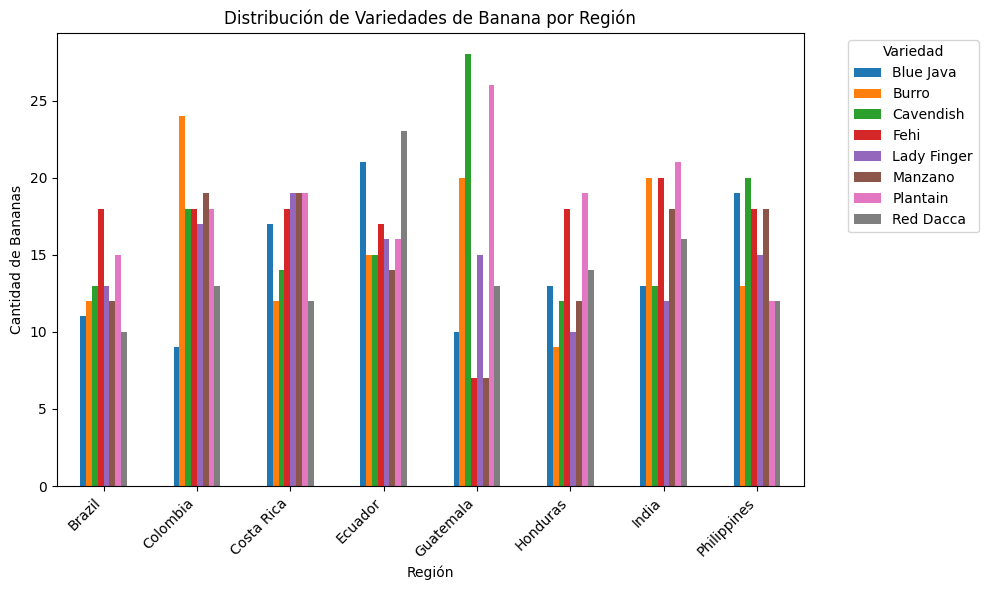

In [ ]:
banana_type_by_region = banana_df.groupby(['region', 'variety'])['variety'].count().unstack()

banana_type_by_region.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Distribución de Variedades de Banana por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Bananas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Variabilidad relativa de la calidad de las bananas por región

        region      mean       std  coef_var
0       Brazil  2.505096  0.526961  0.210355
1     Colombia  2.459338  0.531773  0.216226
2   Costa Rica  2.516231  0.554245  0.220268
3      Ecuador  2.387299  0.591392  0.247724
4    Guatemala  2.457778  0.504090  0.205100
5     Honduras  2.498505  0.492159  0.196981
6        India  2.476541  0.541832  0.218786
7  Philippines  2.437717  0.567293  0.232715


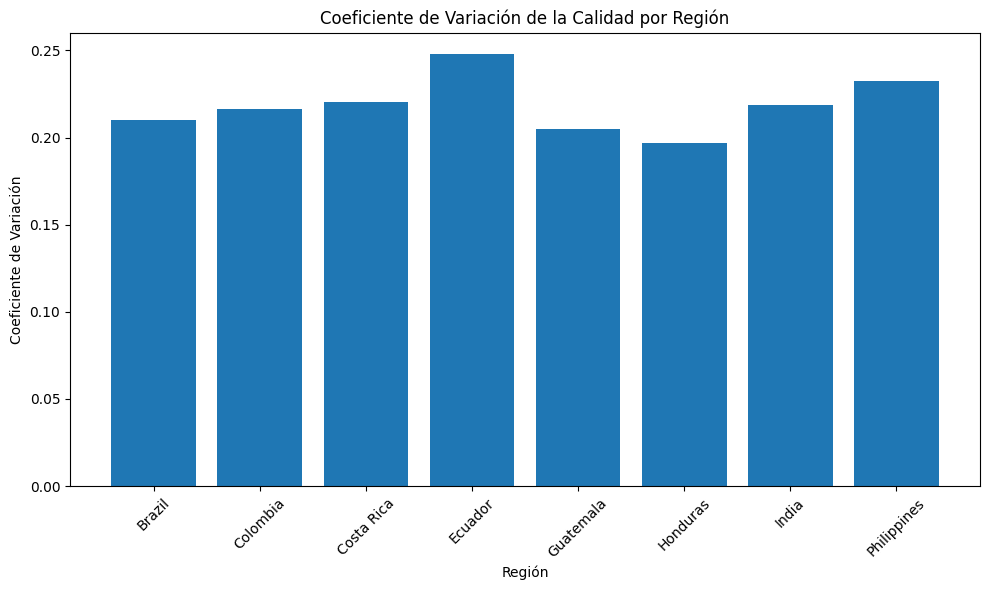

In [ ]:
region_stats = banana_df.groupby("region")["quality_score"].agg(["mean", "std"]).reset_index()

region_stats["coef_var"] = region_stats["std"] / region_stats["mean"]

print(region_stats)

plt.figure(figsize=(10, 6))
plt.bar(region_stats["region"], region_stats["coef_var"])
plt.xlabel("Región")
plt.ylabel("Coeficiente de Variación")
plt.title("Coeficiente de Variación de la Calidad por Región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis

Vamos a analizar que relacion tiene la calidad de las bananas con el resto de variables y verificar si esta relacionado con una mayor produccion en cada region.



## Ripeness

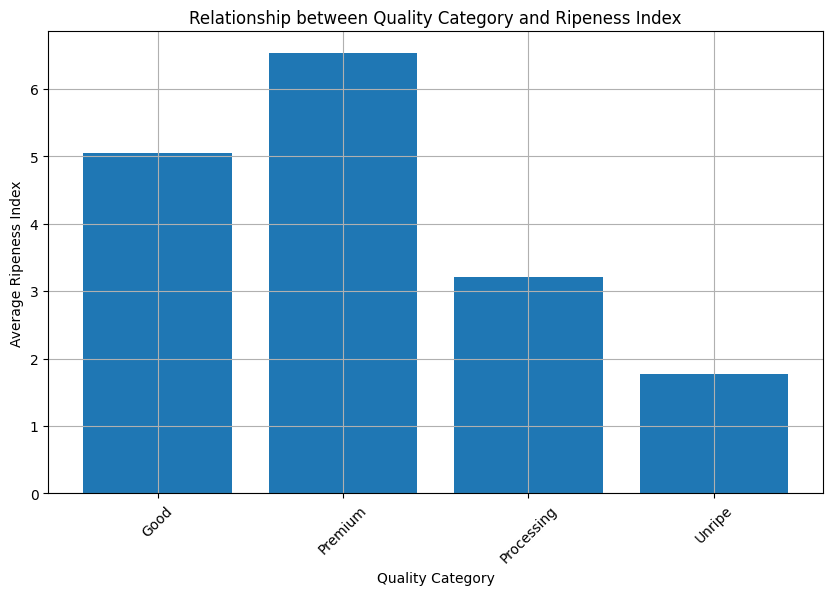

In [ ]:
plt.figure(figsize=(10, 6))

grouped_data = banana_df.groupby('quality_category')['ripeness_index'].mean()

plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Quality Category')
plt.ylabel('Average Ripeness Index')
plt.title('Relationship between Quality Category and Ripeness Index')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

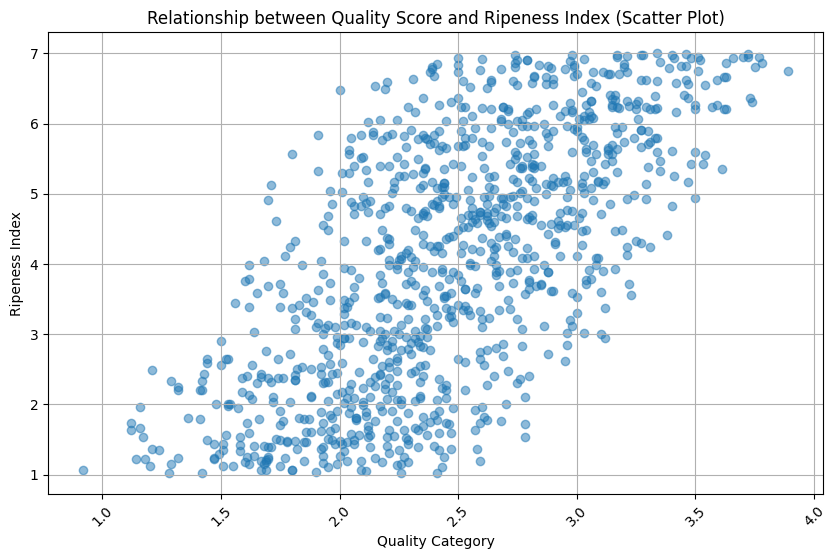

In [ ]:
plt.figure(figsize=(10, 6))

x = banana_df['quality_score']
y = banana_df['ripeness_index']
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Quality Category')
plt.ylabel('Ripeness Index')
plt.title('Relationship between Quality Score and Ripeness Index (Scatter Plot)')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Firmness

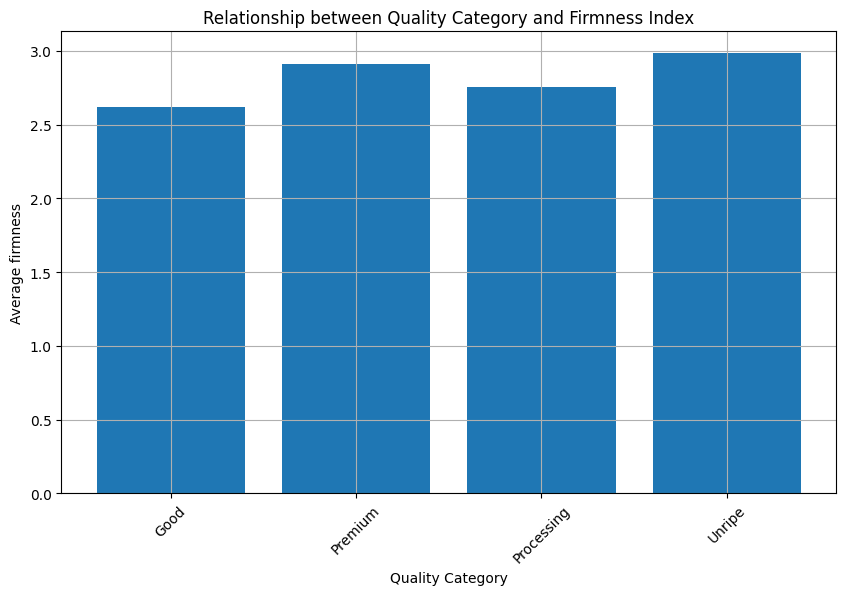

In [ ]:
plt.figure(figsize=(10, 6))

grouped_data = banana_df.groupby('quality_category')['firmness_kgf'].mean()

plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Quality Category')
plt.ylabel('Average firmness')
plt.title('Relationship between Quality Category and Firmness Index')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

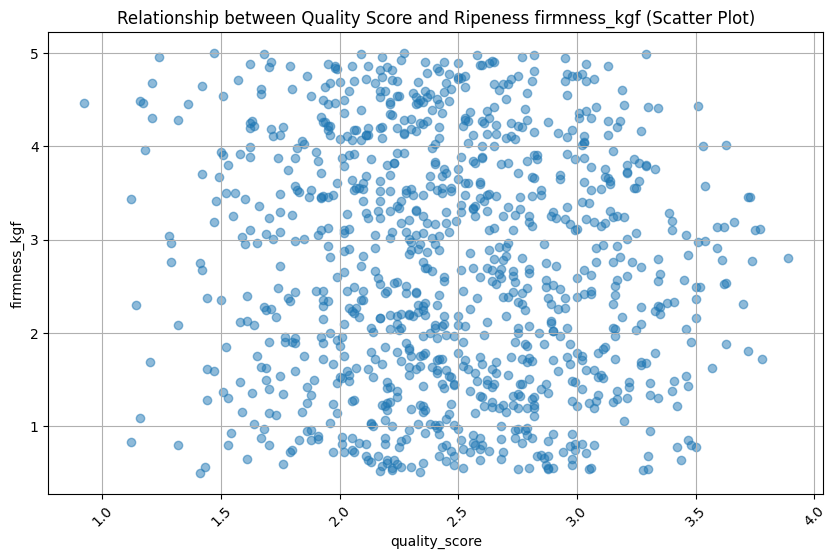

In [ ]:
plt.figure(figsize=(10, 6))

x = banana_df['quality_score']
y = banana_df['firmness_kgf']
plt.scatter(x, y, alpha=0.5)

plt.xlabel('quality_score')
plt.ylabel('firmness_kgf')
plt.title('Relationship between Quality Score and Ripeness firmness_kgf (Scatter Plot)')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Length

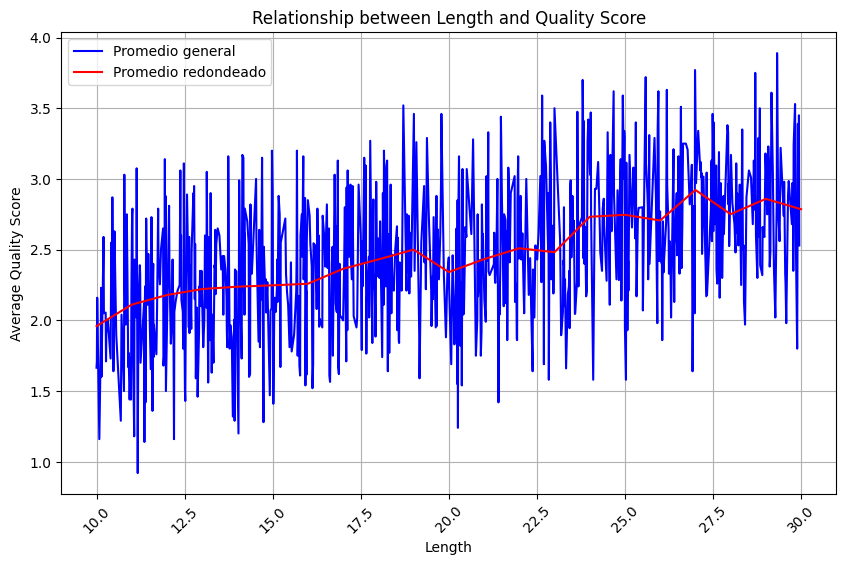

In [ ]:
plt.figure(figsize=(10, 6))

grouped_data = banana_df.groupby('length_cm')['quality_score'].mean()
plt.plot(grouped_data.index, grouped_data.values, label='Promedio general', color='blue')

rounded_lengths = banana_df['length_cm'].round(0)
rounded_grouped_data = banana_df.groupby(rounded_lengths)['quality_score'].mean()
plt.plot(rounded_grouped_data.index, rounded_grouped_data.values, label='Promedio redondeado', color='red')

plt.xlabel('Length')
plt.ylabel('Average Quality Score')
plt.title('Relationship between Length and Quality Score')

plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()


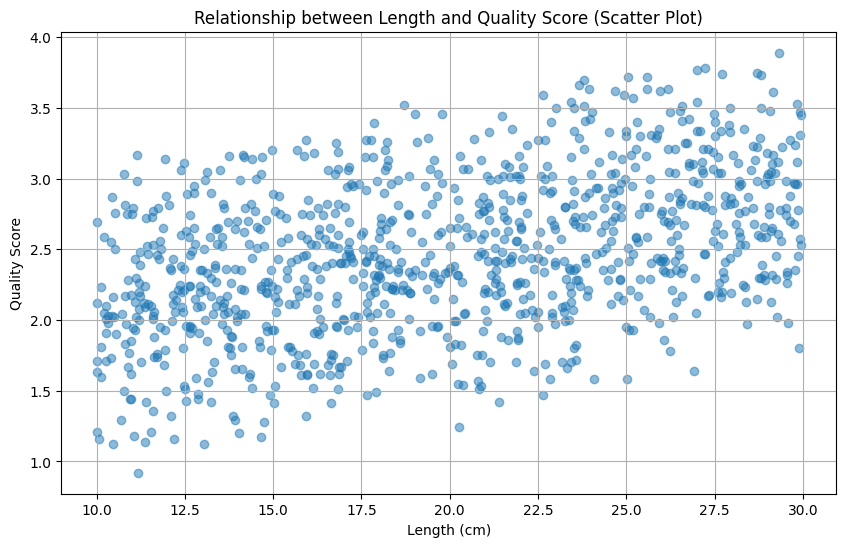

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(banana_df['length_cm'], banana_df['quality_score'], alpha=0.5)

plt.xlabel('Length (cm)')
plt.ylabel('Quality Score')
plt.title('Relationship between Length and Quality Score (Scatter Plot)')

plt.grid(True)

plt.show()

#Comparacion Entre Paices


En los siguientes graficos se va a analizar la relacion entre la calidad de las bananas y la produccion maxima de los paises en cuestion.

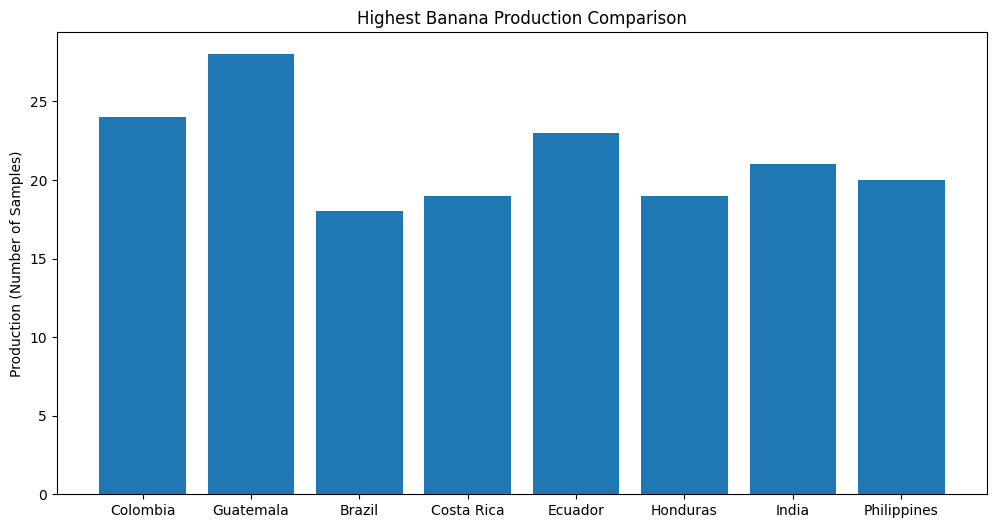

In [ ]:
colombia_data = banana_df[banana_df['region'] == 'Colombia']
guatemala_data = banana_df[banana_df['region'] == 'Guatemala']
brazil_data = banana_df[banana_df['region'] == 'Brazil']
costarica_data = banana_df[banana_df['region'] == "Costa Rica"]
ecuador_data = banana_df[banana_df['region'] == "Ecuador"]
honduras_data = banana_df[banana_df['region'] == "Honduras"]
india_data = banana_df[banana_df['region'] == "India"]
philippines_data = banana_df[banana_df["region"] == "Philippines"]


colombia_production = colombia_data.groupby('variety')['variety'].count()
guatemala_production = guatemala_data.groupby('variety')['variety'].count()
brazil_production = brazil_data.groupby('variety')['variety'].count()
costarica_production = costarica_data.groupby('variety')['variety'].count()
ecuador_production = ecuador_data.groupby('variety')['variety'].count()
honduras_production = honduras_data.groupby('variety')['variety'].count()
india_production = india_data.groupby('variety')['variety'].count()
philippines_production = philippines_data.groupby('variety')['variety'].count()


max_colombia_variety = colombia_production.idxmax()
max_guatemala_variety = guatemala_production.idxmax()
max_brazil_variety = brazil_production.idxmax()
max_costarica_variety = costarica_production.idxmax()
max_ecuador_variety = ecuador_production.idxmax()
max_honduras_variety = honduras_production.idxmax()
max_india_variety = india_production.idxmax()
max_philippines_variety = philippines_production.idxmax()


max_colombia_production = colombia_production.max()
max_guatemala_production = guatemala_production.max()
max_brazil_production = brazil_production.max()
max_costarica_production = costarica_production.max()
max_ecuador_production = ecuador_production.max()
max_honduras_production = honduras_production.max()
max_india_production = india_production.max()
max_philippines_production = philippines_production.max()


plt.figure(figsize=(12, 6))
plt.bar(['Colombia', 'Guatemala', 'Brazil', 'Costa Rica', 'Ecuador', 'Honduras', 'India', 'Philippines'], [max_colombia_production, max_guatemala_production, max_brazil_production, max_costarica_production, max_ecuador_production, max_honduras_production, max_india_production, max_philippines_production])
plt.title('Highest Banana Production Comparison')
plt.ylabel('Production (Number of Samples)')
plt.show()

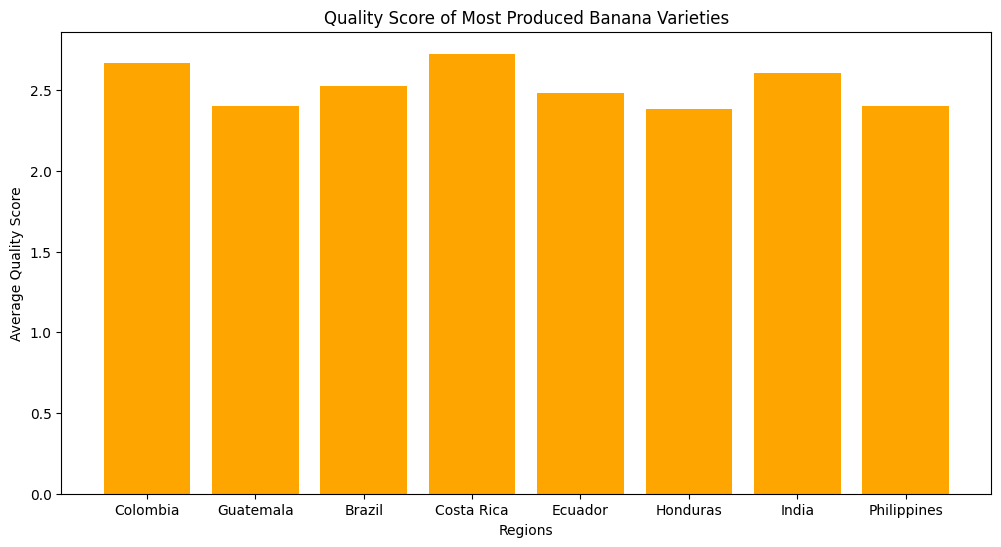

In [ ]:
colombia_quality = colombia_data[colombia_data['variety'] == max_colombia_variety]['quality_score'].mean()
guatemala_quality = guatemala_data[guatemala_data['variety'] == max_guatemala_variety]['quality_score'].mean()
brazil_quality = brazil_data[brazil_data['variety'] == max_brazil_variety]['quality_score'].mean()
costarica_quality = costarica_data[costarica_data['variety'] == max_costarica_variety]['quality_score'].mean()
ecuador_quality = ecuador_data[ecuador_data['variety'] == max_ecuador_variety]['quality_score'].mean()
honduras_quality = honduras_data[honduras_data['variety'] == max_honduras_variety]['quality_score'].mean()
india_quality = india_data[india_data['variety'] == max_india_variety]['quality_score'].mean()
philippines_quality = philippines_data[philippines_data['variety'] == max_philippines_variety]['quality_score'].mean()


plt.figure(figsize=(12, 6))
plt.bar(
    ['Colombia', 'Guatemala', 'Brazil', 'Costa Rica', 'Ecuador', 'Honduras', 'India', 'Philippines'],
    [colombia_quality, guatemala_quality, brazil_quality, costarica_quality, ecuador_quality, honduras_quality, india_quality, philippines_quality],
    color='orange'
)
plt.title('Quality Score of Most Produced Banana Varieties')
plt.ylabel('Average Quality Score')
plt.xlabel('Regions')
plt.show()


Podemos observar que Guatemala, por mas de ser el pais que mas bananas produce, es el pais con peor calidad promedio de bananas, mientras que, todos los otros paises que producen menos cantidad, producen una calidad promedio ligeramente superior